In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_columns', None)
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [26]:
df = pd.read_csv('HCV-Egy-Data.csv')
df.shape

(1385, 29)

In [27]:
df.head()

,Age,Gender,BMI,Fever,Nausea/Vomting,Headache,Diarrhea,Fatigue & generalized bone ache,Jaundice,Epigastric pain,WBC,RBC,HGB,Plat,AST 1,ALT 1,ALT4,ALT 12,ALT 24,ALT 36,ALT 48,ALT after 24 w,RNA Base,RNA 4,RNA 12,RNA EOT,RNA EF,Baseline histological Grading,Baselinehistological staging
0,56,1,35,2,1,1,1,2,2,2,7425,4248807.0,14,112132.0,99,84,52.0,109,81,5,5,5,655330,634536,288194,5,5,13,2
1,46,1,29,1,2,2,1,2,2,1,12101,4429425.0,10,129367.0,91,123,95.0,75,113,57,123,44,40620,538635,637056,336804,31085,4,2
2,57,1,33,2,2,2,2,1,1,1,4178,4621191.0,12,151522.0,113,49,95.0,107,116,5,5,5,571148,661346,5,735945,558829,4,4
3,49,2,33,1,2,1,2,1,2,1,6490,4794631.0,10,146457.0,43,64,109.0,80,88,48,77,33,1041941,449939,585688,744463,582301,10,3
4,59,1,32,1,1,2,1,2,2,2,3661,4606375.0,11,187684.0,99,104,67.0,48,120,94,90,30,660410,738756,3731527,338946,242861,11,1


In [28]:
df['Baselinehistological staging'].unique()

array([2, 4, 3, 1], dtype=int64)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1385 entries, 0 to 1384
Data columns (total 29 columns):
Age                                 1385 non-null int64
Gender                              1385 non-null int64
BMI                                 1385 non-null int64
Fever                               1385 non-null int64
Nausea/Vomting                      1385 non-null int64
Headache                            1385 non-null int64
Diarrhea                            1385 non-null int64
Fatigue & generalized bone ache     1385 non-null int64
Jaundice                            1385 non-null int64
Epigastric pain                     1385 non-null int64
WBC                                 1385 non-null int64
RBC                                 1385 non-null float64
HGB                                 1385 non-null int64
Plat                                1385 non-null float64
AST 1                               1385 non-null int64
ALT 1                               1385 non-null

In [30]:
df.describe()

,Age,Gender,BMI,Fever,Nausea/Vomting,Headache,Diarrhea,Fatigue & generalized bone ache,Jaundice,Epigastric pain,WBC,RBC,HGB,Plat,AST 1,ALT 1,ALT4,ALT 12,ALT 24,ALT 36,ALT 48,ALT after 24 w,RNA Base,RNA 4,RNA 12,RNA EOT,RNA EF,Baseline histological Grading,Baselinehistological staging
count,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1.385000e+03,1385.000000,1385.00000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1.385000e+03,1.385000e+03,1.385000e+03,1385.000000,1385.000000,1385.000000,1385.000000
mean,46.319134,1.489531,28.608664,1.515523,1.502527,1.496029,1.502527,1.498917,1.501083,1.503971,7533.386282,4.422130e+06,12.587726,158348.06065,82.774729,83.916245,83.405776,83.510469,83.709025,83.117690,83.629603,33.438267,5.909512e+05,6.008956e+05,2.887536e+05,287660.336462,291378.290975,9.761733,2.536462
std,8.781506,0.500071,4.076215,0.499939,0.500174,0.500165,0.500174,0.500179,0.500179,0.500165,2668.220333,3.463577e+05,1.713511,38794.78555,25.993242,25.922800,26.529730,26.064478,26.205994,26.399031,26.223955,7.073569,3.539354e+05,3.623151e+05,2.853507e+05,264559.525070,267700.691713,4.023896,1.121392
min,32.000000,1.000000,22.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2991.000000,3.816422e+06,10.000000,93013.00000,39.000000,39.000000,39.000000,39.000000,39.000000,5.000000,5.000000,5.000000,1.100000e+01,5.000000e+00,5.000000e+00,5.000000,5.000000,3.000000,1.000000
25%,39.000000,1.000000,25.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5219.000000,4.121374e+06,11.000000,124479.00000,60.000000,62.000000,61.000000,60.000000,61.000000,61.000000,61.000000,28.000000,2.692530e+05,2.708930e+05,5.000000e+00,5.000000,5.000000,6.000000,2.000000
50%,46.000000,1.000000,29.000000,2.000000,2.000000,1.000000,2.000000,1.000000,2.000000,2.000000,7498.000000,4.438465e+06,13.000000,157916.00000,83.000000,83.000000,82.000000,84.000000,83.000000,84.000000,83.000000,34.000000,5.931030e+05,5.978690e+05,2.343590e+05,251376.000000,244049.000000,10.000000,3.000000
75%,54.000000,2.000000,32.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,9902.000000,4.721279e+06,14.000000,190314.00000,105.000000,106.000000,107.000000,106.000000,107.000000,106.000000,106.000000,40.000000,8.867910e+05,9.090930e+05,5.248190e+05,517806.000000,527864.000000,13.000000,4.000000
max,61.000000,2.000000,35.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,12101.000000,5.018451e+06,15.000000,226464.00000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,45.000000,1.201086e+06,1.201715e+06,3.731527e+06,808450.000000,810333.000000,16.000000,4.000000


In [31]:
df = df.drop('Baseline histological Grading',axis=1)

from sklearn.model_selection import train_test_split
X = df.drop('Baselinehistological staging',axis=1)
y = df['Baselinehistological staging']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))
    

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

# NOW WITH K=7
knn = KNeighborsClassifier(n_neighbors=34)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=9')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

In [32]:
# Remove outliers 
df1 = df
col = list(df1.drop('Baselinehistological staging',axis=1).columns)
for i in col:
    y = df1[i]
    removed_outliers = y.between(y.quantile(.02), y.quantile(.98))
    index_names = df1[~removed_outliers].index 
    df1.drop(index_names, inplace=True)

df1.shape

(855, 28)

In [39]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df1.drop('Baselinehistological staging',axis=1))
scaled_features = scaler.transform(df1.drop('Baselinehistological staging',axis=1))
df_feat = pd.DataFrame(scaled_features,columns=df1.columns[:-1])
df_feat.head()

X_train, X_test, y_train, y_test = train_test_split(scaled_features,df1['Baselinehistological staging'],test_size=0.20)

In [40]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[ 9 10  8  7]
 [11  9 13 11]
 [ 9  4 14 13]
 [16  8 13 16]]
              precision    recall  f1-score   support

           1       0.20      0.26      0.23        34
           2       0.29      0.20      0.24        44
           3       0.29      0.35      0.32        40
           4       0.34      0.30      0.32        53

    accuracy                           0.28       171
   macro avg       0.28      0.28      0.28       171
weighted avg       0.29      0.28      0.28       171



In [41]:
error_rate = []

# Will take some time
for i in range(1,40,2):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

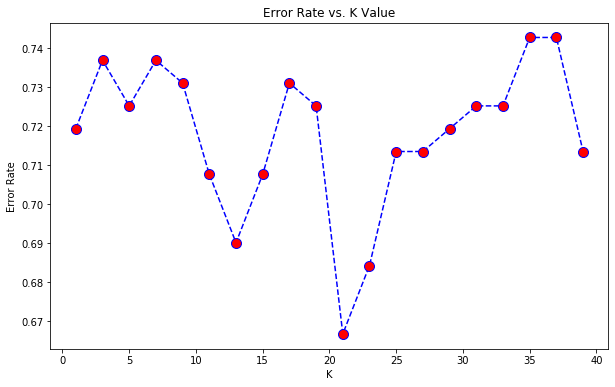

In [42]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40,2),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [43]:
# NOW WITH K=7
knn = KNeighborsClassifier(n_neighbors=21)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=30')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=30


[[15  6 10  3]
 [11 12 15  6]
 [12  5 14  9]
 [21  3 13 16]]


              precision    recall  f1-score   support

           1       0.25      0.44      0.32        34
           2       0.46      0.27      0.34        44
           3       0.27      0.35      0.30        40
           4       0.47      0.30      0.37        53

    accuracy                           0.33       171
   macro avg       0.36      0.34      0.33       171
weighted avg       0.38      0.33      0.34       171



In [44]:
# decision Tree classifier 
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)
pred = dtree.predict(X_test)

print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[11  4 11  8]
 [12  6  9 17]
 [11  8 13  8]
 [23 11  8 11]]
              precision    recall  f1-score   support

           1       0.19      0.32      0.24        34
           2       0.21      0.14      0.16        44
           3       0.32      0.33      0.32        40
           4       0.25      0.21      0.23        53

    accuracy                           0.24       171
   macro avg       0.24      0.25      0.24       171
weighted avg       0.24      0.24      0.24       171



(650, 28)